# Analyse des données Covid

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

table = pd.read_csv("table-indicateurs-open-data-france-2022-04-03-19h00.csv")

Maintenant, nous allons modifier notre dataframe afin qu'il corresponde mieux à nos besoins. 

In [2]:
print(table.columns)
table.drop(columns=['tx_pos','tx_incid','rea','incid_rea','incid_hosp','incid_rad','incid_dchosp','pos','pos_7j','esms_cas','cv_dose1'],inplace=True) 
print(table.columns)
print(table)
# print(table2[0:5])

Index(['date', 'tx_pos', 'tx_incid', 'TO', 'R', 'rea', 'hosp', 'rad', 'dchosp',
       'incid_rea', 'incid_hosp', 'incid_rad', 'incid_dchosp', 'conf',
       'conf_j1', 'pos', 'esms_dc', 'dc_tot', 'pos_7j', 'cv_dose1',
       'esms_cas'],
      dtype='object')
Index(['date', 'TO', 'R', 'hosp', 'rad', 'dchosp', 'conf', 'conf_j1',
       'esms_dc', 'dc_tot'],
      dtype='object')
           date        TO   R     hosp       rad    dchosp  conf   conf_j1  \
0    2020-01-23       NaN NaN      NaN       NaN       NaN   NaN       NaN   
1    2020-01-24       NaN NaN      NaN       NaN       NaN   NaN       NaN   
2    2020-01-25       NaN NaN      NaN       NaN       NaN   NaN       NaN   
3    2020-01-26       NaN NaN      NaN       NaN       NaN   NaN       NaN   
4    2020-01-27       NaN NaN      NaN       NaN       NaN   NaN       NaN   
..          ...       ...  ..      ...       ...       ...   ...       ...   
797  2022-03-30  0.305654 NaN  21688.0  598673.0  113659.0   NaN  169024

On va seulement garder ces huits colonnes `date`, `TO`, `R`, `hosp`, `rad`, `conf`, `conf_j1` et `dc_tot`. On travaillera sur ce jeu de données plus petit pour simplifier les calculs et permettre un meilleur apprentissage. 

In [3]:
table.drop(index=table[0:294].index, inplace=True)
table.fillna(0,inplace=True)

In [4]:
table['dc_tot'] = table['esms_dc'] + table['dchosp']

In [5]:
table['conf'].iloc[0] = table['conf_j1'].iloc[0]
for k in range(len(table)-1) : 
    table['conf'].iloc[k+1] = table['conf'].iloc[k] + table['conf_j1'].iloc[k+1] 

C:\Users\louis\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
table

,date,TO,R,hosp,rad,dchosp,conf,conf_j1,esms_dc,dc_tot
294,2020-11-12,0.965599,0.712412,32654.0,134923.0,29673.0,33172.0,33172.0,0.0,29673.0
295,2020-11-13,0.966192,0.682531,32676.0,137124.0,30129.0,56966.0,23794.0,0.0,30129.0
296,2020-11-14,0.959866,0.658918,32468.0,139110.0,30483.0,89061.0,32095.0,0.0,30483.0
297,2020-11-15,0.964808,0.641595,33050.0,139779.0,30785.0,116289.0,27228.0,0.0,30785.0
298,2020-11-16,0.969355,0.630205,33466.0,140849.0,31291.0,125695.0,9406.0,0.0,31291.0
...,...,...,...,...,...,...,...,...,...,...
797,2022-03-30,0.305654,0.000000,21688.0,598673.0,113659.0,23944255.0,169024.0,28475.0,142134.0
798,2022-03-31,0.306643,0.000000,21922.0,600034.0,113779.0,24113566.0,169311.0,28494.0,142273.0
799,2022-04-01,0.303875,0.000000,22066.0,601418.0,113904.0,24262195.0,148629.0,28503.0,142407.0
800,2022-04-02,0.301107,0.000000,22113.0,602269.0,113961.0,24394309.0,132114.0,28514.0,142475.0


On a maintenant une base de donnée utilisable pour un apprentissage.

# Graphiques 

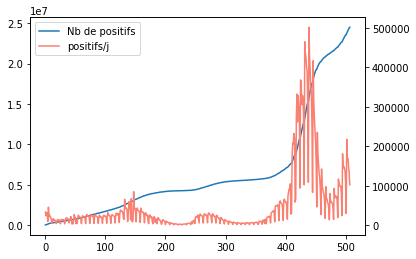

In [27]:
fig, ax = plt.subplots()
l1, = ax.plot(range(508), table['conf'])
axb = ax.twinx()
l2, = axb.plot(range(508),table['conf_j1'],color="salmon")
plt.legend([l1,l2],['Nb de positifs','positifs/j'])
plt.show()


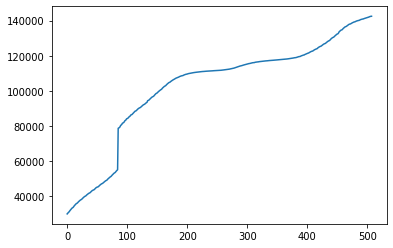

           date        TO         R     hosp       rad       conf  conf_j1  \
378  2021-02-04  0.640569  0.994687  27766.0  229944.0  1409070.0  23448.0   
379  2021-02-05  0.639581  0.985473  27572.0  231518.0  1431209.0  22139.0   

      dc_tot  
378  54901.0  
379  78577.0  
23676.0


In [42]:
plt.plot(range(508),table['dc_tot']) 
plt.show()
print(table.loc[378:379])
print(table['dc_tot'].loc[379]-table['dc_tot'].loc[378])

On note que les décès des esms ne sont pris en compte qu'a partir du 04 février 2021. Ils sont ajoutés d'un seul coups, on peut lisser leur apparition avec une fonction linéaire sur la première partie de la courbe. 